In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/blueberry-yield-zindua-ml-week-2-challenge/sample_submission.csv
/kaggle/input/blueberry-yield-zindua-ml-week-2-challenge/train.csv
/kaggle/input/blueberry-yield-zindua-ml-week-2-challenge/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [3]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, FunctionTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, TweedieRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score


In [4]:
berries = pd.read_csv('/kaggle/input/blueberry-yield-zindua-ml-week-2-challenge/train.csv')
berries.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [5]:
berries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

Data Analysis


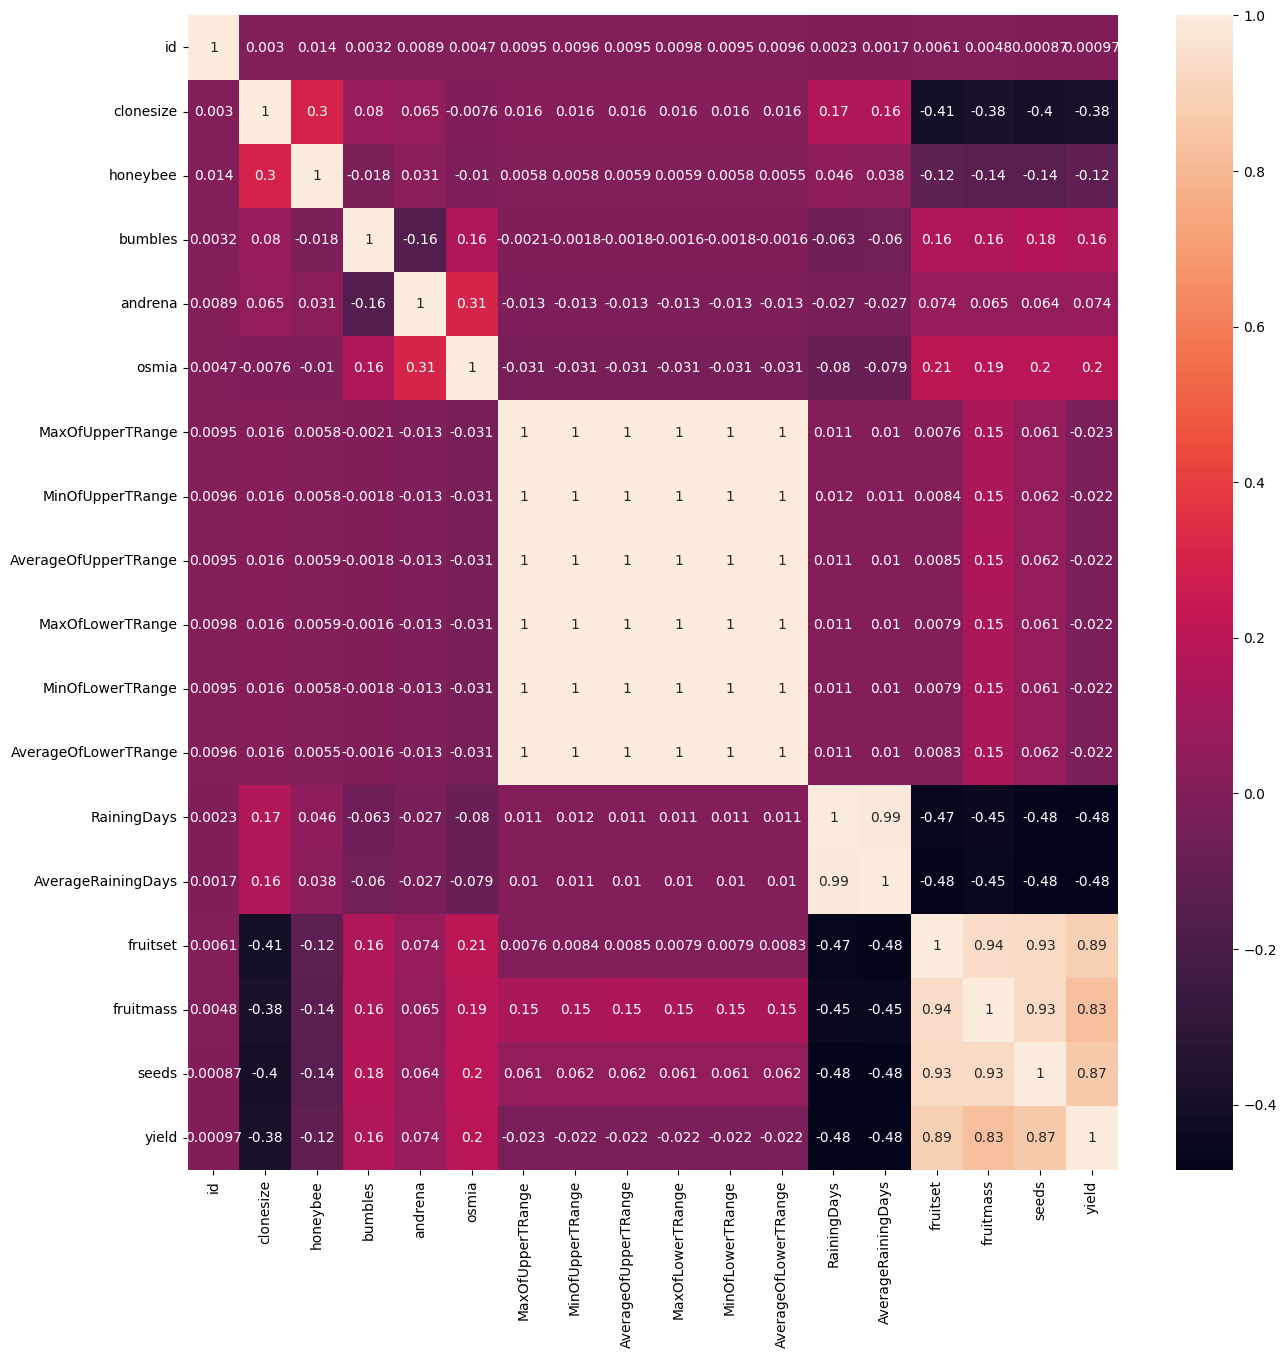

In [6]:
plt.figure(figsize = (15, 15))
sns.heatmap(berries.corr(), annot = True)
plt.show()

Data Preprocessing


In [7]:
#berries.drop(columns = ['id'])


In [8]:
berries.columns

Index(['id', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [9]:
X=berries[['bumbles', 'andrena', 'osmia','AverageOfUpperTRange', 'AverageOfLowerTRange','AverageRainingDays', 'fruitset', 'fruitmass', 'seeds']]
y = berries['yield']

Linear Regression


In [10]:
lin_reg = make_pipeline(StandardScaler(), LinearRegression())
scores = cross_val_score(lin_reg, X, y, cv=10, scoring='neg_mean_absolute_error').mean()*-1
print(scores)

371.63668028644304


Ridge

In [11]:
ridge = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(),Ridge(alpha=0.1))
scores = cross_val_score(ridge, X, y, cv=10, scoring='neg_mean_absolute_error').mean()*-1
print(scores)

367.82311258428115


Lasso

In [12]:
lasso = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), Lasso(alpha=2))
scores = cross_val_score(lasso, X, y, cv=10, scoring='neg_mean_absolute_error').mean()*-1
print(scores)

371.4641275364791


Elastic Net

In [13]:
#lasso = make_pipeline(StandardScaler(), Lasso(alpha=1)).fit(X, y)
#pickle.dump(lasso, open('/kaggle/working/final.sav', 'wb'))

In [14]:
elastic_net = make_pipeline(StandardScaler(), ElasticNet(alpha=0.1, l1_ratio=0.9))
scores = cross_val_score(elastic_net, X, y, cv=10, scoring='neg_mean_absolute_error').mean()*-1
print(scores)

373.1178328982568


GradientBoostingRegressor

In [15]:
from sklearn.ensemble import GradientBoostingRegressor
g_reg = GradientBoostingRegressor(random_state=0)
scores = cross_val_score(g_reg, X, y, cv=10, scoring='neg_mean_absolute_error').mean()*-1
print(scores)

354.7868393603267


In [16]:
g_reg = GradientBoostingRegressor(random_state=0).fit(X, y)
pickle.dump(g_reg, open('/kaggle/working/final.sav', 'wb'))

Fit and export final model

In [17]:
test = pd.read_csv('/kaggle/input/blueberry-yield-zindua-ml-week-2-challenge/test.csv')
test.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,15289,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.399367,0.408088,31.394569
1,15290,12.5,0.25,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.488048,0.442866,36.846956
2,15291,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.583379,0.487057,40.037644
3,15292,25.0,0.50,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.433014,0.422847,33.116091
4,15293,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.360996,0.388860,29.558019


In [18]:
X = test[['bumbles', 'andrena', 'osmia','AverageOfUpperTRange','AverageOfLowerTRange',
        'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds']]
X.shape

(10194, 9)

In [19]:

y_pred =g_reg.predict(X)
y_pred.shape

(10194,)

In [20]:
df = pd.DataFrame(y_pred, columns=['yield'])
df.head()

,yield
0,4257.403949
1,6073.081520
2,7172.372243
3,4721.026075
4,3796.102834


In [21]:
df['id'] =test['id']

In [22]:
df.head()

,yield,id
0,4257.403949,15289
1,6073.081520,15290
2,7172.372243,15291
3,4721.026075,15292
4,3796.102834,15293


In [23]:
df = df.set_index('id')
df.head()

,yield
id,
15289,4257.403949
15290,6073.081520
15291,7172.372243
15292,4721.026075
15293,3796.102834


In [24]:
df.to_csv('/kaggle/working/submission.csv')